#House Price Prediction


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set

<function seaborn.rcmod.set(*args, **kwargs)>

#Mounting G Collab

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#load data set

In [58]:
Data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Practical 1(House price prediction)/Bengaluru_House_Data.csv')

In [59]:
Data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [60]:
Data.shape

(13320, 9)

In [61]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [62]:
Data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#Checking the Qunique Values

In [63]:
for columns in Data.columns:
  print(columns)
  print("_"*50)
  print(Data[columns].value_counts())
  print("_"*50)

area_type
__________________________________________________
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
__________________________________________________
availability
__________________________________________________
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
__________________________________________________
location
__________________________________________________
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st

In [64]:
Data.drop(columns=['society'],inplace=True)

In [65]:
Data.shape

(13320, 8)

In [66]:
Data=Data.dropna(how='any',axis=0)

In [67]:
Data.shape

(12710, 8)

In [68]:
Data.describe()

,bath,balcony,price
count,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778
std,1.226000,0.817287,131.766089
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.030000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [69]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [70]:
# splitting size column for integer values due to inconsistence surfixes
Data['bhk']=Data['size'].str.split().str.get(0).astype(int)

In [71]:
#Checking outliers 
Data[Data.bhk>20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [72]:
#checking for range for this column 
Data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [73]:
#creating a function to deal with the ranges given in some cells in ' total_sqft' column
def covt_range(x):
  temp = x.split('_')
  if len(temp)==2:
    return(flot(temp[0])) + (flot(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [74]:
# Apply "covt_range" to "total_sqft" column
Data['total_sqft'] = Data['total_sqft'].apply(covt_range)

In [75]:
Data ['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [76]:
Data ['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [77]:
Data.drop(columns=['area_type','availability'],inplace=True)

In [78]:
Data.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


<ipython-input-79-20191bd73261>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Data.corr()


<Axes: >

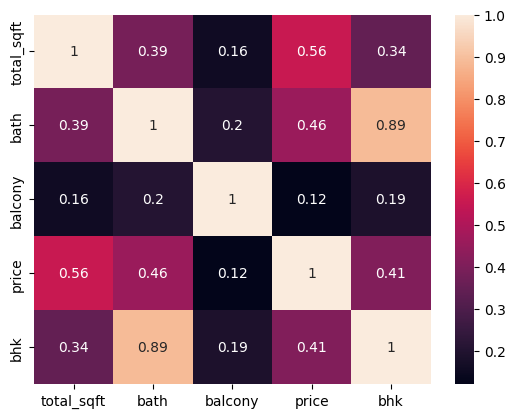

In [79]:
correlation = Data.corr()
sb.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [80]:
Data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [81]:
Data['balcony'].unique()

array([1., 3., 2., 0.])

In [82]:
Data['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [83]:
# "bath" and "bhk" columns are highly corelted we need to drop one of them 
Data.drop(columns=['bath'],inplace=True)

In [84]:
Data.head()

,location,size,total_sqft,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,1.0,51.00,2


In [85]:
#finding price per square feet 
Data['price_per_sqft']=Data['price']*100000/Data['total_sqft']
Data['price_per_sqft']=Data['price_per_sqft'].round(2)
Data['price_per_sqft']

0         3699.81
1         4615.38
2         4305.56
3         6245.89
4         4250.00
           ...   
13314     6530.61
13315     6689.83
13317     5258.55
13318    10407.34
13319     3090.91
Name: price_per_sqft, Length: 12710, dtype: float64

In [86]:
Data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12524.000000,12710.000000,12710.000000,12710.000000,1.252400e+04
mean,1510.454911,1.584343,106.060778,2.737136,6.897454e+03
std,1162.445581,0.817287,131.766089,1.205097,2.276190e+04
min,5.000000,0.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,1.000000,49.030000,2.000000,4.240118e+03
50%,1260.000000,2.000000,70.000000,3.000000,5.392160e+03
75%,1640.000000,2.000000,115.000000,3.000000,7.171310e+03
max,52272.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [87]:
Data['location']=Data['location'].apply(lambda x: x.strip())
location_count= Data['location'].value_counts()

In [88]:
location_count

Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: location, Length: 1254, dtype: int64

In [89]:
location_cnt_less_10=location_count[location_count<=10]
location_cnt_less_10

Kalkere                  10
Kodigehalli              10
Ganga Nagar              10
1st Block Koramangala    10
Gunjur Palya             10
                         ..
Shirdi Sai Nagar          1
S R Layout                1
Meenakshi Layout          1
Vidyapeeta                1
Abshot Layout             1
Name: location, Length: 1017, dtype: int64

In [90]:
Data['location']= Data['location'].apply(lambda x: 'other' if x in location_cnt_less_10 else x)

In [91]:
Data['location'].value_counts()

other                        2739
Whitefield                    515
Sarjapur  Road                372
Electronic City               302
Kanakpura Road                261
                             ... 
Marsur                         11
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
ISRO Layout                    11
Vishveshwarya Layout           11
Name: location, Length: 238, dtype: int64

Removing Outliars

In [92]:
Data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12524.000000,12710.000000,12710.000000,12710.000000,1.252400e+04
mean,1510.454911,1.584343,106.060778,2.737136,6.897454e+03
std,1162.445581,0.817287,131.766089,1.205097,2.276190e+04
min,5.000000,0.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,1.000000,49.030000,2.000000,4.240118e+03
50%,1260.000000,2.000000,70.000000,3.000000,5.392160e+03
75%,1640.000000,2.000000,115.000000,3.000000,7.171310e+03
max,52272.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [93]:
#removing outliers
(Data['total_sqft']/Data['bhk']).describe()

count    12524.000000
mean       569.033597
std        381.881959
min          0.714286
25%        472.916667
50%        550.000000
75%        621.270833
max      26136.000000
dtype: float64

In [94]:
Data = Data[((Data['total_sqft']/Data['bhk'])>=300)]

In [95]:
Data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,11869.000000,11869.000000,11869.000000,11869.000000,11869.000000
mean,1541.229363,1.606875,105.170490,2.609824,6220.296594
std,1181.717548,0.794513,134.650984,0.919589,4004.343253
min,300.000000,0.000000,9.000000,1.000000,267.830000
25%,1109.000000,1.000000,48.700000,2.000000,4198.470000
50%,1285.000000,2.000000,68.270000,2.000000,5263.160000
75%,1656.000000,2.000000,110.000000,3.000000,6844.740000
max,52272.000000,3.000000,2912.000000,13.000000,176470.590000


In [96]:
Data.shape

(11869, 7)

In [98]:
Data.price_per_sqft.describe()

count     11869.000000
mean       6220.296594
std        4004.343253
min         267.830000
25%        4198.470000
50%        5263.160000
75%        6844.740000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [102]:
# removing the outlier from 'price_per_sqft'  columns

q = Data['price_per_sqft'].quantile(0.99)
data_1 = Data[Data['price_per_sqft']  < q ]
data_1.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,11749.000000,11749.000000,11749.000000,11749.000000,11749.000000
mean,1527.941078,1.606349,98.363056,2.595966,5989.980988
std,1162.632575,0.793249,102.483076,0.903830,2882.911306
min,300.000000,0.000000,9.000000,1.000000,267.830000
25%,1107.000000,1.000000,48.330000,2.000000,4186.950000
50%,1280.000000,2.000000,68.000000,2.000000,5240.170000
75%,1650.000000,2.000000,110.000000,3.000000,6770.830000
max,52272.000000,3.000000,2200.000000,13.000000,20740.740000


In [103]:
Data.bhk.describe()

count    11869.000000
mean         2.609824
std          0.919589
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: bhk, dtype: float64

In [104]:
#removing outliers or invalid data points from "bhk" column
def bhk_outliers(df):
  exclude_indices =np.array([]) #creating an empty array which will carry all the values we need
  for location,location_df in df.groupby ('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0] #number of unique values
      }
  for bhk,bhk_df in location_df.groupby('bhk'):
    stats =bhk_stats.get(bhk-1)
    if stats and stats['count']>5:  #checking for threshold no.of data points to get accurate mean
       exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

In [105]:
Data=bhk_outliers(Data)

In [107]:
Data

,location,size,total_sqft,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,1.0,51.00,2,4250.00
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.61
13315,Whitefield,5 Bedroom,3453.0,0.0,231.00,5,6689.83
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,1.0,60.00,2,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,1.0,488.00,4,10407.34


In [108]:
Data.shape

(10397, 7)

In [109]:
#Removig columns which aren not necessary for model
Data.drop(columns=['size','price_per_sqft'],inplace=True)

In [110]:
Data.head()

,location,total_sqft,balcony,price,bhk
0,Electronic City Phase II,1056.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,3.0,120.00,4
2,Uttarahalli,1440.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,1.0,95.00,3
4,Kothanur,1200.0,1.0,51.00,2


In [111]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10397 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    10397 non-null  object 
 1   total_sqft  10397 non-null  float64
 2   balcony     10397 non-null  float64
 3   price       10397 non-null  float64
 4   bhk         10397 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 487.4+ KB


In [112]:
Data.to_csv("Cleaned_data.csv")

In [114]:
x=d=Data.drop(columns= ['price']) #independent features
y=d=Data['price']# feature which we are preedicting through model

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)

In [123]:
print(x_train.shape)
print(x_test.shape)

(8317, 4)
(2080, 4)


#Model 1

In [137]:
column_trans=make_column_transformer ((OneHotEncoder(sparse_output=False),['location']),remainder='passthrough')

In [138]:
scaler= StandardScaler()

In [144]:
from sklearn.metrics.pairwise import normalize
lr=LinearRegression()

In [145]:
pipe = make_pipeline(column_trans,scaler,lr)

In [146]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [147]:
model = make_pipeline(StandardScaler(with_mean = False), LinearRegression())

In [148]:
y_pred_lr = pipe.predict(x_test)

In [149]:
r2_score(y_test, y_pred_lr)

0.48445085412248157

#Model 2:


In [151]:
lasso = Lasso()

In [152]:
pipe = make_pipeline(column_trans,scaler, lasso)


In [153]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [154]:
y_pred_lasso = pipe.predict(x_test)
r2_score(y_test, y_pred_lasso)

0.4823921692643245

#Model 3:


In [155]:
ridge = Ridge()

In [156]:
pipe = make_pipeline(column_trans,scaler, ridge)

In [157]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [158]:
y_pred_ridge = pipe.predict(x_test)
r2_score(y_test, y_pred_ridge)

0.4843041091164243